In [1]:
import pandas as pd
%matplotlib inline
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\nospm\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from pathlib import Path
csvpath = Path('./data/amazon.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999


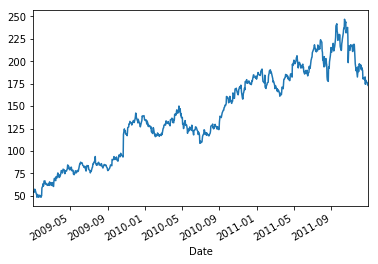

In [8]:
df.dropna()
df.Close.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
adfuller(df['Close'])

(-1.6648918763604759,
 0.44928592062602124,
 0,
 755,
 {'1%': -3.4390409569041207,
  '5%': -2.865375732701395,
  '10%': -2.568812543748081},
 3982.4046357133866)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [11]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df['Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff,Returns
Date,,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002,NaN
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000,-0.005519
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000,0.061043
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000,-0.020223
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999,0.017082


In [13]:
# Drop the NaNs created by the pct_change function
df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff,Returns
Date,,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002,NaN
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000,-0.005519
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000,0.061043
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000,-0.020223
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999,0.017082


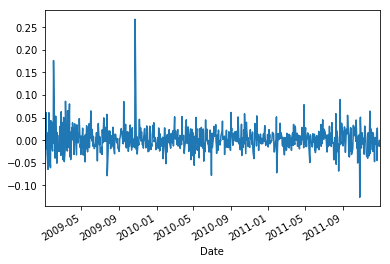

In [14]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df['Returns'].plot()

### Technique 2: Applying a Diff

In [15]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df['Close'].diff()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff,Returns
Date,,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,NaN,NaN
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000,-0.005519
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000,0.061043
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000,-0.020223
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999,0.017082


In [23]:
# Drop the NaNs created from the diff function
df = df.dropna()

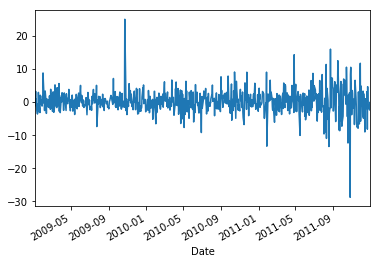

In [24]:
# Plot the 
df['Diff'].plot()

In [25]:
adfuller(df['Diff'])

(-27.769680251147587,
 0.0,
 0,
 754,
 {'1%': -3.439052522969989,
  '5%': -2.8653808299915013,
  '10%': -2.5688152592363274},
 3980.2028164695776)